In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import binom , norm , geom , poisson 

import warnings
warnings.filterwarnings("ignore")

walmart = pd.read_csv("walmart_data.csv")
df = walmart.copy()

# Observation of data - 

In [12]:
df.head()

# Given data set 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.shape

# checking shape of the dataframe

(550068, 10)

In [17]:
df.dtypes

# checking data types of all the columns 

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
df.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


## Statistical Summary - 
   In the given data we have 550068 rows and 10 columns, In those columns there are five columns has integer type of data and rest five has object type of data and we don't have any null values in our data, In given data there are 3631 types of product , 7 age groups , 3 types of city category and Purchase column has mean of approx of 9264 and standard deviation of 5023.

# Missing value detection - 

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In this data we don't have any missing value.

# Non-Graphical Analysis -

In [36]:
# Unique attributes 

for i in df.columns :
    print( i, ":" , df[i].nunique() )
    print( i , ":" ,df[i].unique())
    print("--"*50)
    print(" "*100)

User_ID : 5891
User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
----------------------------------------------------------------------------------------------------
                                                                                                    
Product_ID : 3631
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
----------------------------------------------------------------------------------------------------
                                                                                                    
Gender : 2
Gender : ['F' 'M']
----------------------------------------------------------------------------------------------------
                                                                                                    
Age : 7
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
----------------------------------------------------------------------------------------------------
     

Above data represent the number of unique data in a column and the unique data of columns respectively.

In [22]:
df["User_ID"].value_counts()



# user id and their count of purchases 

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [24]:
df["Product_ID"].value_counts()

# prodcuts and their value counts 

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [16]:
df["Gender"].value_counts()

# Numbers of gender respective their gender  

M    414259
F    135809
Name: Gender, dtype: int64

From above data we can see that we have more male customers than female in our data.

In [26]:
df["Age"].value_counts()


# Numbers of customer respective their age group 

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Most of customers belong to 26-35 age group following by 36-45 , 18-25 and others age group.

In [27]:
df["City_Category"].value_counts()


# city category and number of customers 

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [28]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [29]:
df["Marital_Status"].value_counts()


# Marital status and number of customers

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [37]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

# Visual Analysis -

## Outliers detection -

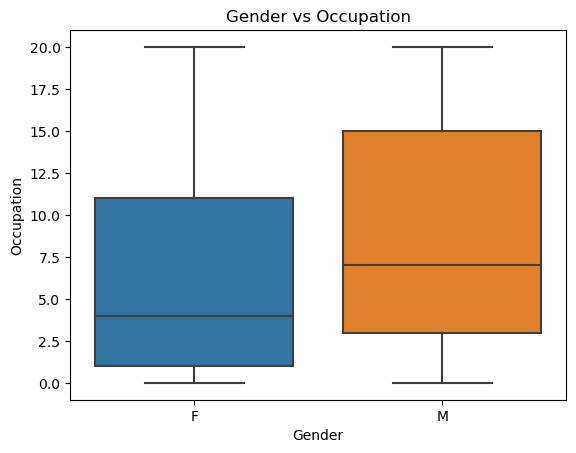

In [3]:
sns.boxplot(data = df , x = "Gender" , y = df.Occupation )
plt.title("Gender vs Occupation")
plt.show()

From above chart we can see that Male has more median occupation than female and there is no outliers in that data.

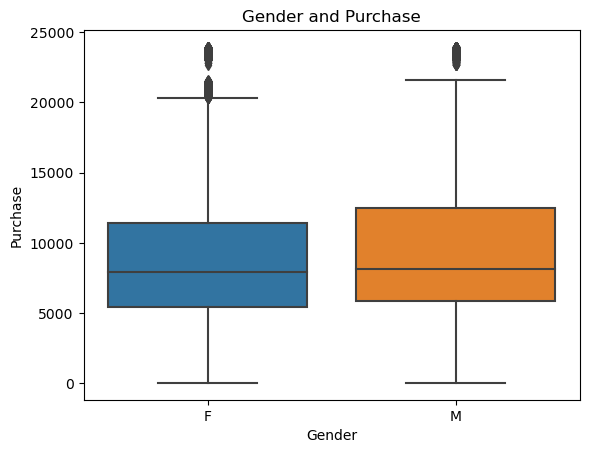

In [9]:
sns.boxplot(data = df , x = "Gender" , y = df.Purchase )
plt.title("Gender and Purchase")
plt.show()

Above chart is representing that both gender has almost same median purchase amount and both gender has outliers but female has more outliers than male.

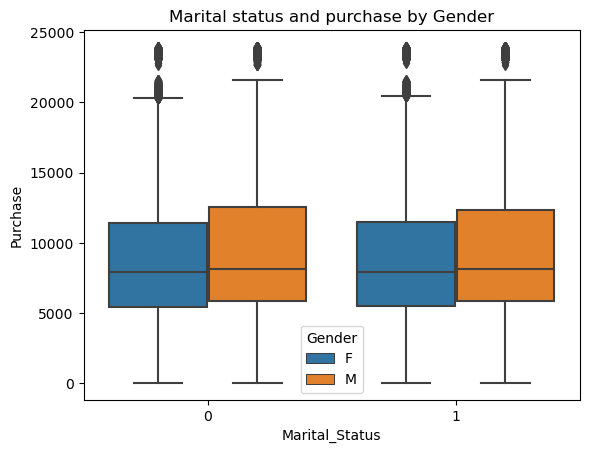

In [34]:
sns.boxplot(data = df , hue = "Gender" , y = "Purchase" , x = "Marital_Status" )
plt.title("Marital status and purchase by Gender")
plt.show()

There are some outliers in marital status for both gender.

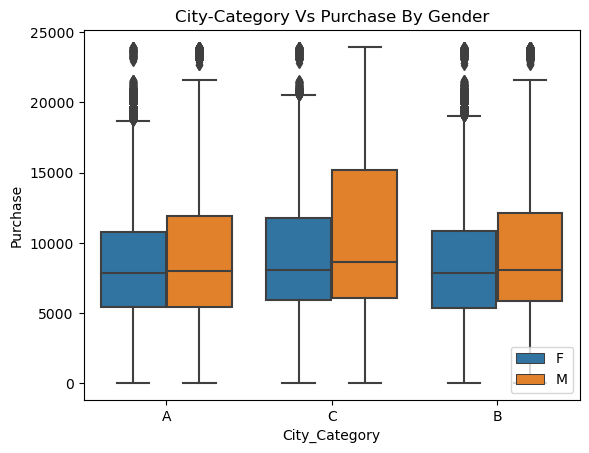

In [36]:
sns.boxplot(data = df , hue = "Gender" , y = "Purchase" ,x = "City_Category" )
plt.legend( loc = "lower right")
plt.title("City-Category Vs Purchase By Gender")
plt.show()

There are outliers in city category for both the gender except males for city category C.

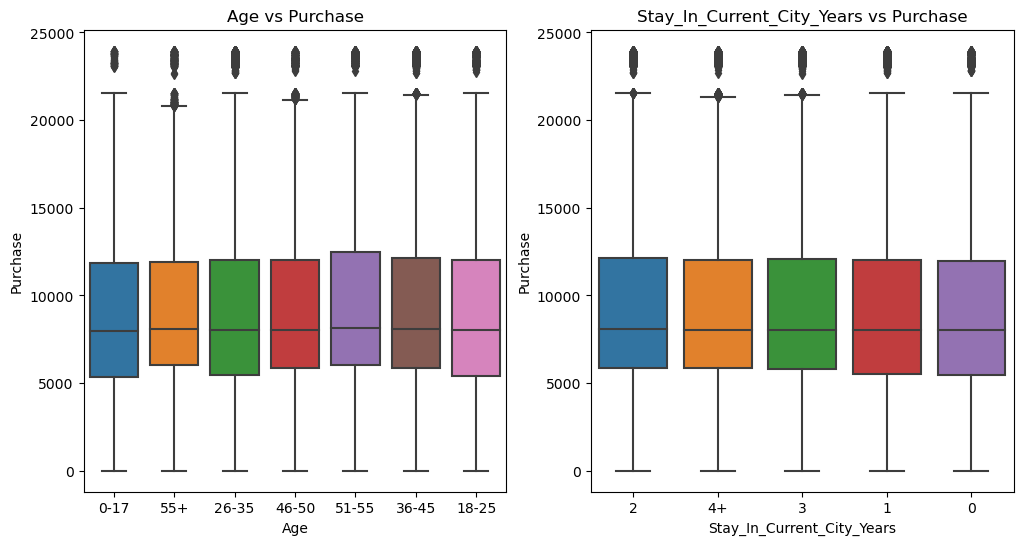

In [13]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data = df , x = "Age" , y = "Purchase")
plt.title("Age vs Purchase")

plt.subplot(1,2,2)
sns.boxplot(data = df , x = "Stay_In_Current_City_Years" , y = "Purchase")
plt.title("Stay_In_Current_City_Years vs Purchase")
plt.show()

Above graph shows that Age category and their purchasing , Stay in current city in years and their purchasing pattern so we can observe that for all data we have some outliers for both cases.

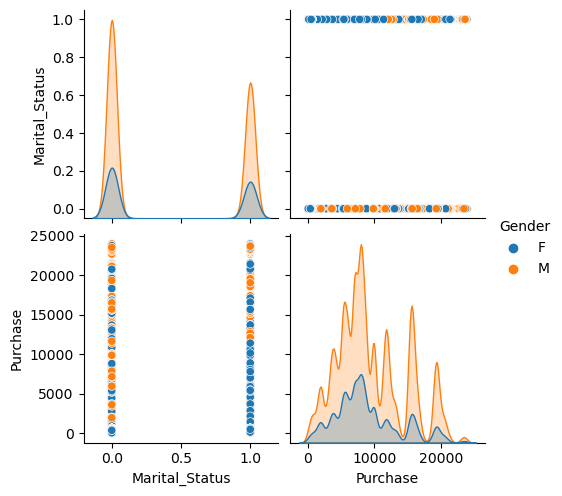

In [16]:
a = df[["Gender","Marital_Status","Purchase"]]
sns.pairplot(data = a , hue = "Gender")
plt.show()

Above chart representing the relationship between Purchase and Marital status By each gender so we can see that female whose marital status is partner (1) are purchasing more than single female.

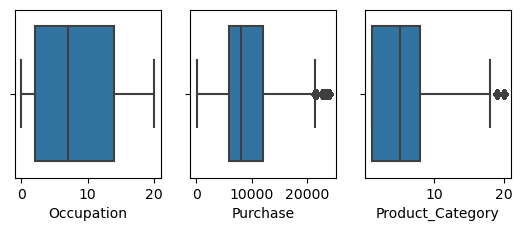

In [5]:
plt.subplot(2,3,1)
sns.boxplot(data = df , x = "Occupation"  ) 

plt.subplot(2,3,2)
sns.boxplot(data = df , x = "Purchase" )

plt.subplot(2,3,3)
sns.boxplot(data = df , x = "Product_Category" )
plt.show()

Above graph showing that there are some outliers in purchases and proudcut category but do not have any outliers in occupation.

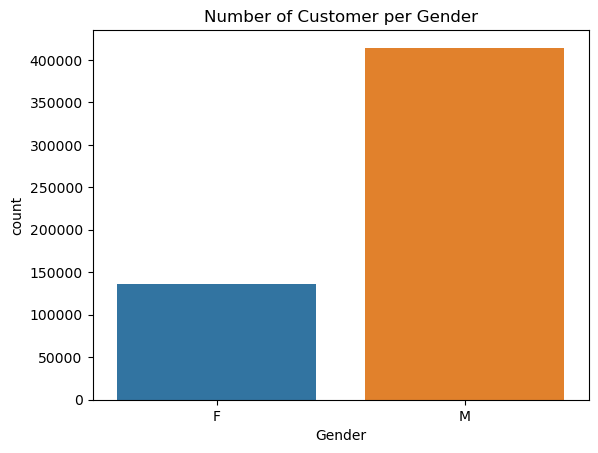

In [3]:
sns.countplot( data = df , x = "Gender")
plt.title("Number of Customer per Gender")
plt.show()

There are more male customers than female customers in our given data.

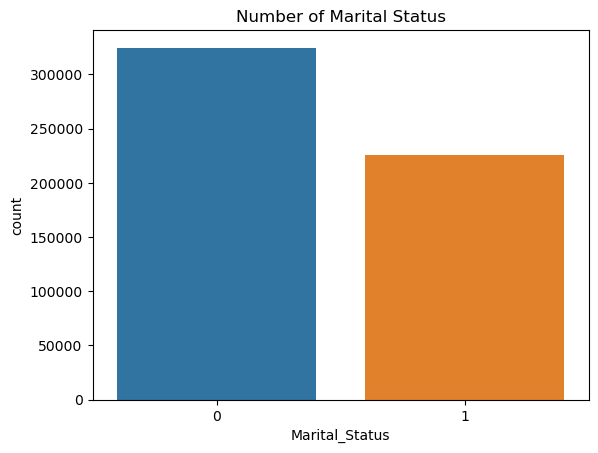

In [28]:
sns.countplot( data = df , x = "Marital_Status" )
plt.title("Number of Marital Status")
plt.show()

In above graph we see that there are more single customers as compare to partner customers.

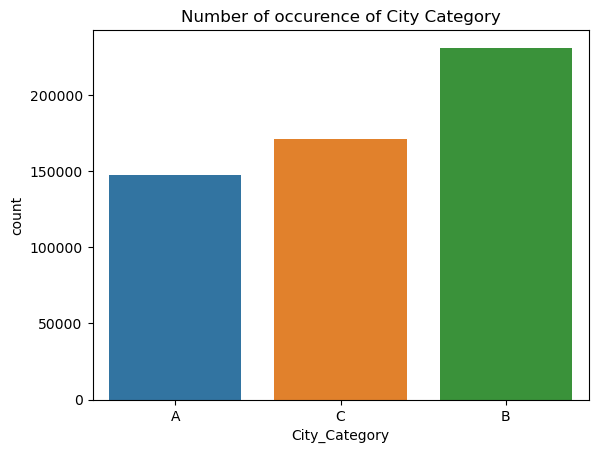

In [2]:
sns.countplot( data = df , x = "City_Category")
plt.title("Number of occurence of City Category")
plt.show()

We can see that city category B has maximum number of customer followed by city category C and A.

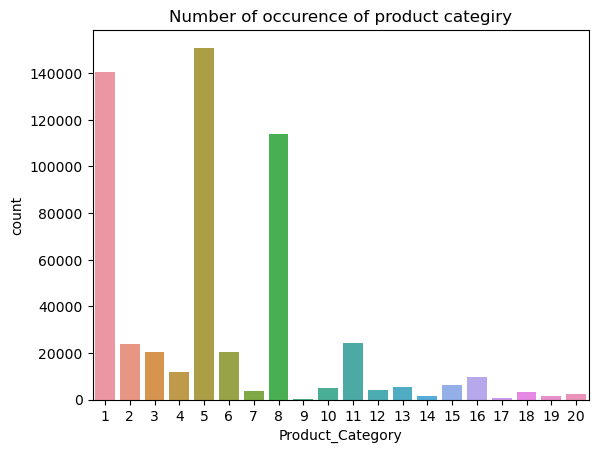

In [3]:
sns.countplot( data = df , x = "Product_Category")
plt.title("Number of occurence of product categiry")
plt.show()

From above chart we can see that product category 1,5 and 8 has maximum number of occurences compare to other product category.

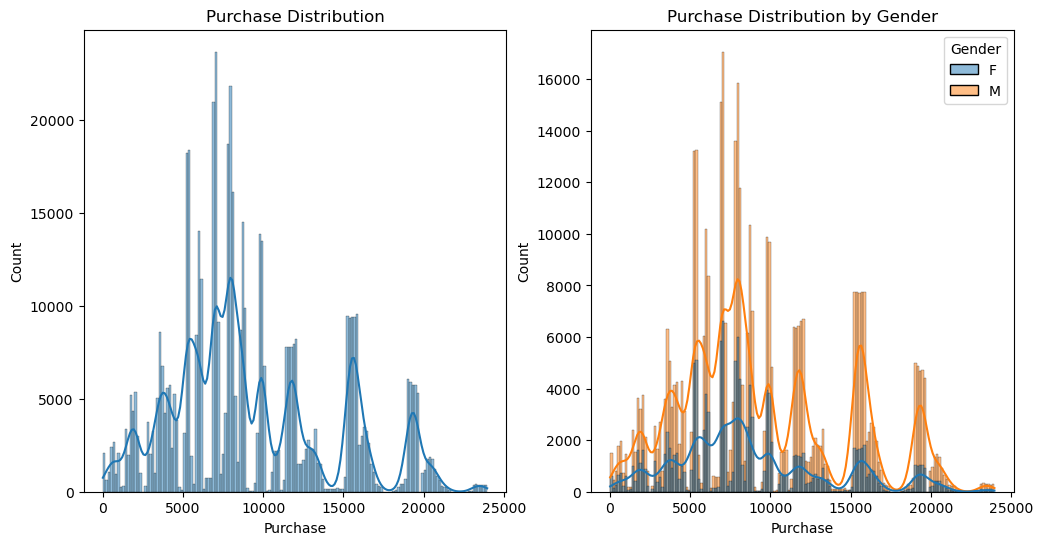

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot( data = df , x = "Purchase", kde = True)
plt.title("Purchase Distribution")
plt.subplot(1,2,2)
sns.histplot( data = df , x = "Purchase",hue = "Gender", kde = True)
plt.title("Purchase Distribution by Gender")
plt.show()

From above graph we can see that most of customers are purchasing 5000 - 10000 price but there are some outliers in data and male customers are purchasing more than female purchase in our given data.
We can see the purchasing trend of both the gender that is almost same.

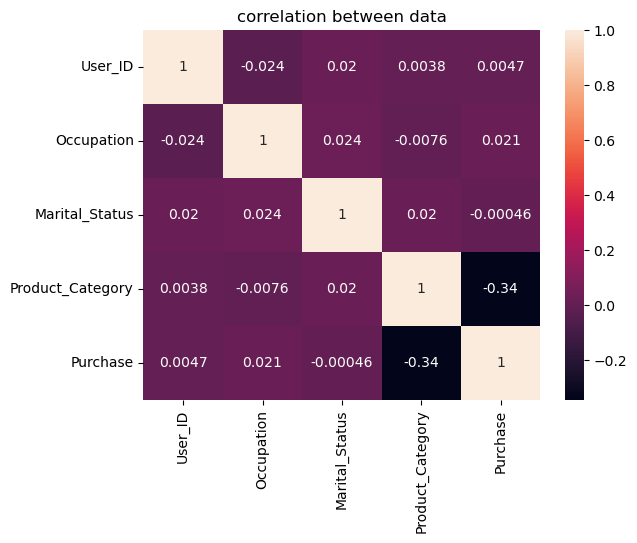

In [21]:
sns.heatmap( data = df.corr() , annot = True)
plt.title("correlation between data")
plt.show()

We can observe that product category and purchase are highly negative correlated , occupation and marital staus are positive correlated , purchase and marital status are low negative correlated.

In [3]:
# identifiying total customer and their total purchase amount

df2 = df.groupby(["User_ID","Gender"])["Purchase"].sum().reset_index()
df2

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [31]:
# total customers by Gender 

customers = df2.Gender.value_counts()
customers

M    4225
F    1666
Name: Gender, dtype: int64

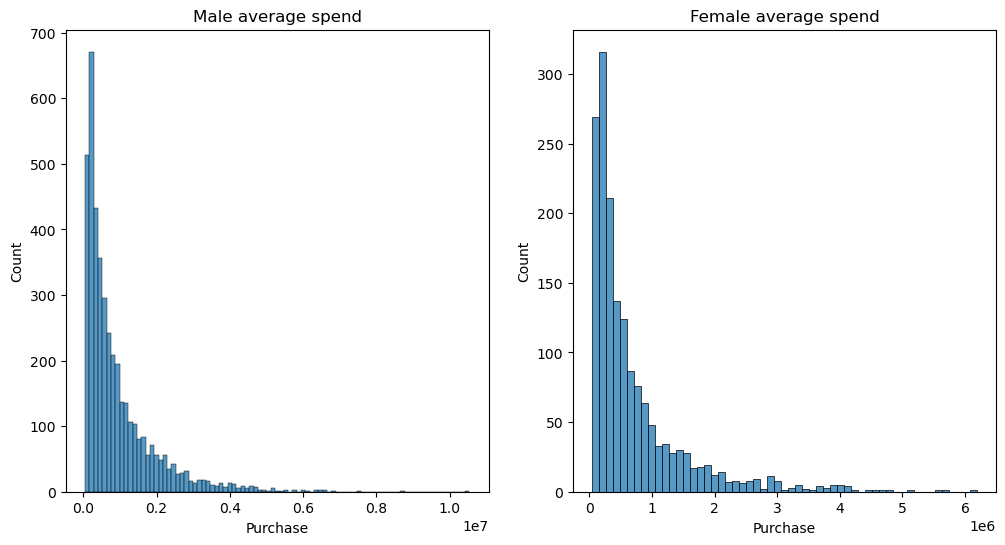

In [25]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
df_male_spend = df2[df2["Gender"]== "M"]
sns.histplot(data = df_male_spend , x = "Purchase" )
plt.title("Male average spend")

plt.subplot(1,2,2)
df_female_spend = df2[df2["Gender"]== "F"]
sns.histplot(data = df_female_spend , x = "Purchase" )
plt.title("Female average spend")

plt.show()

we can observe that average spend by male are higher than average spend by female.

In [32]:
df_avg_spent  = df2.groupby(["Gender"])["Purchase"].mean()
df_avg_spent

Gender
F    712024.394958
M    925344.402367
Name: Purchase, dtype: float64

we can see that males are average spending more money than females.

# Male vs Female, CLT and Confidence Interval (CI) -

In [17]:
male_data = df2.loc[(df2["Gender"] == "M")]
male_data.head()

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668


In [16]:
female_data = df2.loc[(df2["Gender"] == "F")]
female_data.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490


## Sample size = 300

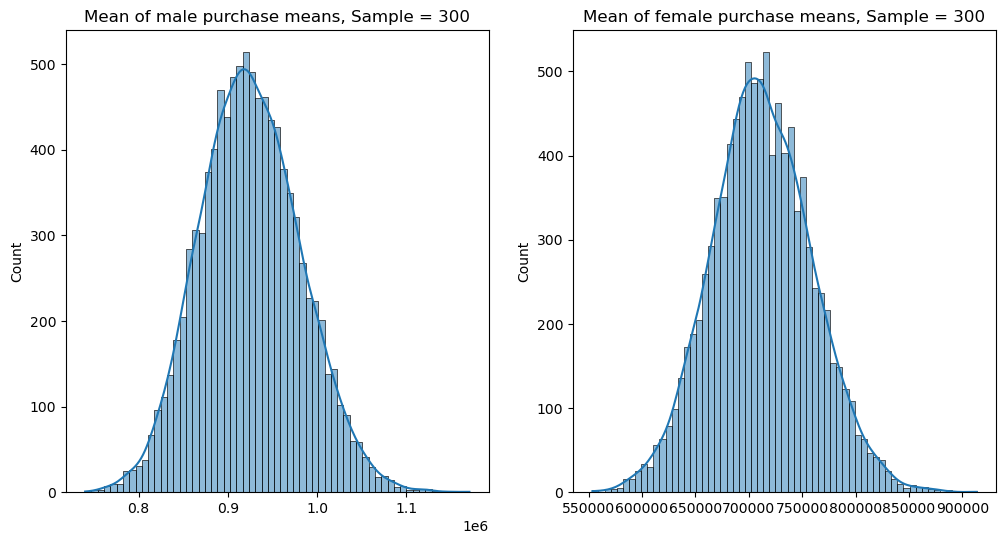

In [102]:
sample_size = 300 
sample_mean_male = []
sample_mean_female = []
for i in range(10000) :
    male_spend_mean = df2[(df2["Gender"]== "M")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_male.append(male_spend_mean)
    female_spend_mean = df2[(df2["Gender"]== "F")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_female.append(female_spend_mean)
    

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data = sample_mean_male,kde = True)
plt.title("Mean of male purchase means, Sample = 300")
plt.subplot(1,2,2)
sns.histplot(data = sample_mean_female,kde = True)
plt.title("Mean of female purchase means, Sample = 300")
plt.show()

In [103]:
# Mean of sample mean collection 

sample_mean_male = np.mean(sample_mean_male)
print("sample_mean_male :" ,sample_mean_male)
sample_mean_female = np.mean(sample_mean_female)
print("sample_mean_female :", sample_mean_female)

sample_mean_male : 925318.5013496666
sample_mean_female : 712313.3736943335


In [104]:
# Population mean for male and female 

population_male_mean = male_data["Purchase"].mean()
print( "population_male_mean :", population_male_mean)
population_female_mean = female_data["Purchase"].mean()
print( "population_female_mean :", population_female_mean)

population_male_mean : 925344.4023668639
population_female_mean : 712024.3949579832


In [105]:
# population standard deviation for male and female 

population_male_std = male_data["Purchase"].std()
print( "population_male_std :", population_male_std )
population_female_std = female_data["Purchase"].std()
print( "population_female_std :", population_female_std )

population_male_std : 985830.100795388
population_female_std : 807370.7261464577


In [106]:
# sample standard deviation for male and female 

sample_male_std = population_male_std / np.sqrt(sample_size) 
sample_female_std = population_female_std / np.sqrt(sample_size)

90% CI 

In [107]:
left_limit_male = sample_mean_male + norm.ppf(5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(95/100) * ( sample_male_std)
male_CI = print("Male_CI_90 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(95/100) * ( sample_female_std)
female_CI = print("Female_CI_90 :" ,[left_limit_female,upper_limit_female])

Male_CI_90 : [831698.486869419, 1018938.5158299142]
Female_CI_90 : [635640.8730151849, 788985.874373482]


95% CI 

In [108]:
left_limit_male = sample_mean_male + norm.ppf(2.5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(97.5/100) * ( sample_male_std)
male_CI = print("Male_CI_95 :" ,[left_limit_male,upper_limit_male])

left_limit_female = sample_mean_female + norm.ppf(2.5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(97.5/100) * ( sample_female_std)
female_CI = print("Female_CI_95 :" ,[left_limit_female,upper_limit_female])

Male_CI_95 : [813763.373521373, 1036873.6291779601]
Female_CI_95 : [620952.4541125284, 803674.2932761386]


 99% CI 

In [109]:
left_limit_male = sample_mean_male + norm.ppf(0.5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(99.5/100) * ( sample_male_std)
male_CI = print("Male_CI_99 :" ,[left_limit_male,upper_limit_male])

left_limit_female = sample_mean_female + norm.ppf(0.5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(99.5/100) * ( sample_female_std)
female_CI = print("Female_CI_99 :" ,[left_limit_female,upper_limit_female])

Male_CI_99 : [778710.2118668914, 1071926.7908324418]
Female_CI_99 : [592244.7725801078, 832381.9748085592]


From above data we can see that 
For 90% CI-
 Average amount spent by male lie in range : [831698.486869419, 1018938.5158299142]
 Average amount spent by female lie in range : [635640.8730151849, 788985.874373482]

For 95% CI -
 Average amount spent by male lie in range : [813763.373521373, 1036873.6291779601]
 Average amount spent by female lie in range : [620952.4541125284, 803674.2932761386]
 
For 99% CI -
 Average amount spent by male lie in range : [778710.2118668914, 1071926.7908324418]
 Average amount spent by female lie in range : [592244.7725801078, 832381.9748085592]

## Sample size = 3000

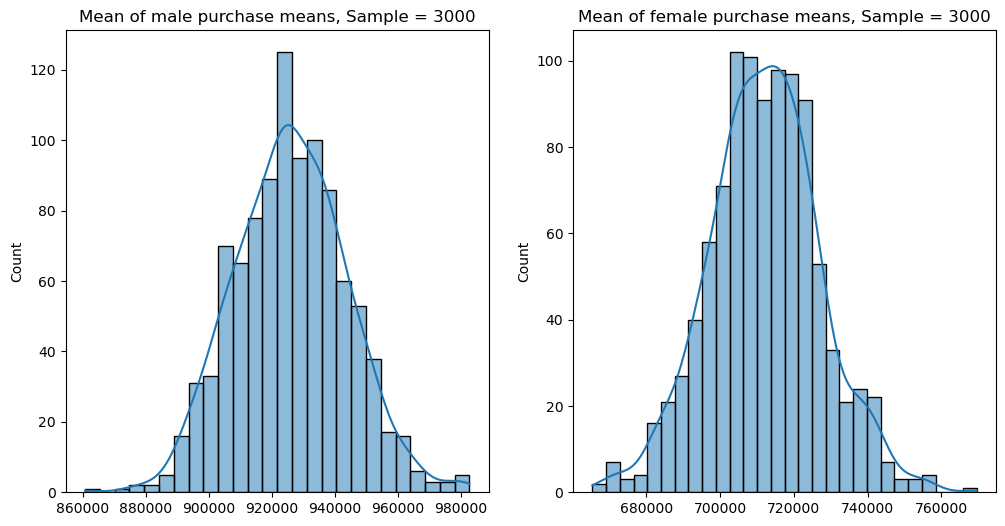

In [110]:
sample_size = 3000
sample_mean_male = []
sample_mean_female = []
for i in range(1000) :
    male_spend_mean = df2[(df2["Gender"]== "M")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_male.append(male_spend_mean)
    female_spend_mean = df2[(df2["Gender"]== "F")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_female.append(female_spend_mean)
    

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data = sample_mean_male,kde = True)
plt.title("Mean of male purchase means, Sample = 3000")
plt.subplot(1,2,2)
sns.histplot(data = sample_mean_female,kde = True)
plt.title("Mean of female purchase means, Sample = 3000")
plt.show()

In [111]:
# Mean of sample mean collection 

sample_mean_male = np.mean(sample_mean_male)
print("sample_mean_male :" ,sample_mean_male)
sample_mean_female = np.mean(sample_mean_female)
print("sample_mean_female :", sample_mean_female)

# Population mean for male and female 

population_male_mean = male_data["Purchase"].mean()
print( "population_male_mean :", population_male_mean)
population_female_mean = female_data["Purchase"].mean()
print( "population_female_mean :", population_female_mean)

# population standard deviation for male and female 

population_male_std = male_data["Purchase"].std()
print( "population_male_std :", population_male_std )
population_female_std = female_data["Purchase"].std()
print( "population_female_std :", population_female_std )

# sample standard deviation for male and female 

sample_male_std = population_male_std / np.sqrt(sample_size) 
sample_female_std = population_female_std / np.sqrt(sample_size)

sample_mean_male : 925968.0087756667
sample_mean_female : 712071.107128
population_male_mean : 925344.4023668639
population_female_mean : 712024.3949579832
population_male_std : 985830.100795388
population_female_std : 807370.7261464577


90% CI 

In [112]:
left_limit_male = sample_mean_male + norm.ppf(5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(95/100) * ( sample_male_std)
male_CI = print("Male_CI_90 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(95/100) * ( sample_female_std)
female_CI = print("Female_CI_90 :" ,[left_limit_female,upper_limit_female])

Male_CI_90 : [896362.7607421139, 955573.2568092195]
Female_CI_90 : [687825.1335233083, 736317.0807326916]


95% CI

In [113]:
left_limit_male = sample_mean_male + norm.ppf(2.5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(97.5/100) * ( sample_male_std)
male_CI = print("Male_CI_95 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(2.5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(97.5/100) * ( sample_female_std)
female_CI = print("Female_CI_95 :" ,[left_limit_female,upper_limit_female])

Male_CI_95 : [890691.1799148027, 961244.8376365307]
Female_CI_95 : [683180.2476274018, 740961.9666285982]


99% CI 

In [114]:
left_limit_male = sample_mean_male + norm.ppf(0.5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(99.5/100) * ( sample_male_std)
male_CI = print("Male_CI_99 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(0.5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(99.5/100) * ( sample_female_std)
female_CI = print("Female_CI_99 :" ,[left_limit_female,upper_limit_female])

Male_CI_99 : [879606.3969129788, 972329.6206383546]
Female_CI_99 : [674102.0816288816, 750040.1326271184]


From above data we can see that 
For 90% CI-
 Average amount spent by male lie in range : [896362.7607421139, 955573.2568092195]
 Average amount spent by female lie in range : [687825.1335233083, 736317.0807326916]

For 95% CI -
 Average amount spent by male lie in range : [890691.1799148027, 961244.8376365307]
 Average amount spent by female lie in range : [683180.2476274018, 740961.9666285982]
 
For 99% CI -
 Average amount spent by male lie in range : [879606.3969129788, 972329.6206383546]
 Average amount spent by female lie in range : [674102.0816288816, 750040.1326271184]

## Sample size = 30000

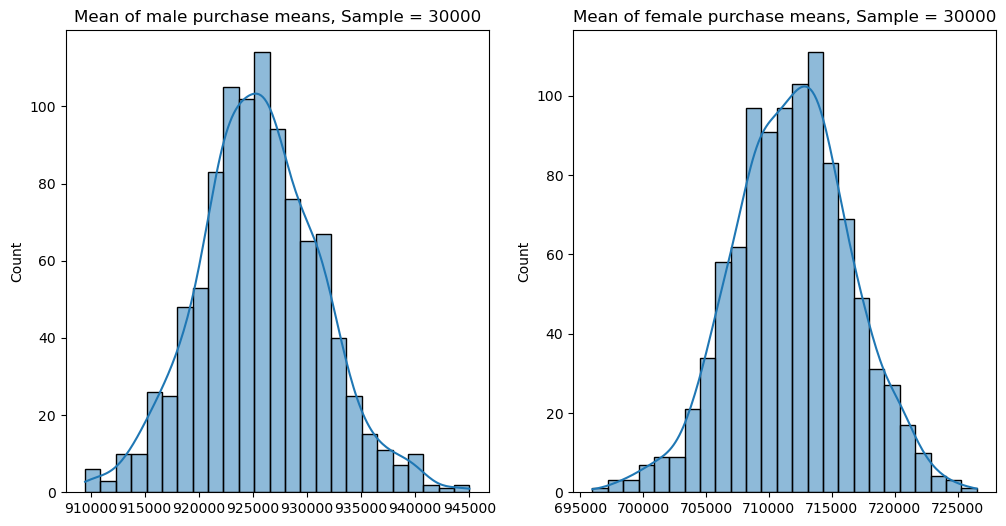

In [115]:
sample_size = 30000
sample_mean_male = []
sample_mean_female = []
for i in range(1000) :
    male_spend_mean = df2[(df2["Gender"]== "M")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_male.append(male_spend_mean)
    female_spend_mean = df2[(df2["Gender"]== "F")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_female.append(female_spend_mean)
    

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data = sample_mean_male,kde = True)
plt.title("Mean of male purchase means, Sample = 30000")
plt.subplot(1,2,2)
sns.histplot(data = sample_mean_female,kde = True)
plt.title("Mean of female purchase means, Sample = 30000")
plt.show()

In [116]:
# Mean of sample mean collection 

sample_mean_male = np.mean(sample_mean_male)
print("sample_mean_male :" ,sample_mean_male)
sample_mean_female = np.mean(sample_mean_female)
print("sample_mean_female :", sample_mean_female)

# Population mean for male and female 

population_male_mean = male_data["Purchase"].mean()
print( "population_male_mean :", population_male_mean)
population_female_mean = female_data["Purchase"].mean()
print( "population_female_mean :", population_female_mean)

# population standard deviation for male and female 

population_male_std = male_data["Purchase"].std()
print( "population_male_std :", population_male_std )
population_female_std = female_data["Purchase"].std()
print( "population_female_std :", population_female_std )

# sample standard deviation for male and female 

sample_male_std = population_male_std / np.sqrt(sample_size) 
sample_female_std = population_female_std / np.sqrt(sample_size)

sample_mean_male : 925625.4700714333
sample_mean_female : 711870.2456381
population_male_mean : 925344.4023668639
population_female_mean : 712024.3949579832
population_male_std : 985830.100795388
population_female_std : 807370.7261464577


90% CI

In [117]:
left_limit_male = sample_mean_male + norm.ppf(5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(95/100) * ( sample_male_std)
male_CI = print("Male_CI_90 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(95/100) * ( sample_female_std)
female_CI = print("Female_CI_90 :" ,[left_limit_female,upper_limit_female])

Male_CI_90 : [916263.4686234086, 934987.4715194581]
Female_CI_90 : [704202.9955701851, 719537.4957060148]


95% CI

In [118]:
left_limit_male = sample_mean_male + norm.ppf(2.5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(97.5/100) * ( sample_male_std)
male_CI = print("Male_CI_95 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(2.5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(97.5/100) * ( sample_female_std)
female_CI = print("Female_CI_95 :" ,[left_limit_female,upper_limit_female])

Male_CI_95 : [914469.957288604, 936780.9828542627]
Female_CI_95 : [702734.1536799194, 721006.3375962805]


99% CI

In [119]:
left_limit_male = sample_mean_male + norm.ppf(0.5/100) * ( sample_male_std ) 
upper_limit_male = sample_mean_male + norm.ppf(99.5/100) * ( sample_male_std)
male_CI = print("Male_CI_99 :" ,[left_limit_male,upper_limit_male])


left_limit_female = sample_mean_female + norm.ppf(0.5/100) * ( sample_female_std ) 
upper_limit_female = sample_mean_female + norm.ppf(99.5/100) * ( sample_female_std)
female_CI = print("Female_CI_99 :" ,[left_limit_female,upper_limit_female])

Male_CI_99 : [910964.6411231558, 940286.2990197109]
Female_CI_99 : [699863.3855266774, 723877.1057495226]


From above data we can see that
For 90% CI-
Average amount spent by male lie in range :  [916263.4686234086, 934987.4715194581]
Average amount spent by female lie in range : [704202.9955701851, 719537.4957060148]

For 95% CI - 
Average amount spent by male lie in range : [914469.957288604, 936780.9828542627]
Average amount spent by female lie in range : [702734.1536799194, 721006.3375962805]

For 99% CI - 
Average amount spent by male lie in range :  [910964.6411231558, 940286.2990197109]
Average amount spent by female lie in range : [699863.3855266774, 723877.1057495226]

For male and female we can see that larger the sample size we get closer the sample mean to actual population mean and greater the confidence interval the ranges increase at for greater sample size we observe that male and female purchase doesn't overlap.

# Married vs Unmarried, CLT and CI -

In [121]:
# identifiying total customer and their total purchase amount

df3 = df.groupby(["User_ID","Marital_Status"])["Purchase"].sum().reset_index()
df3

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [123]:
married_data = df3.loc[(df3["Marital_Status"] == 1 )]
married_data.head()

,User_ID,Marital_Status,Purchase
3,1000004,1,206468
4,1000005,1,821001
6,1000007,1,234668
7,1000008,1,796593
9,1000010,1,2169510


In [124]:
unmarried_data = df3.loc[(df3["Marital_Status"] == 0 )]
unmarried_data.head()

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
5,1000006,0,379930
8,1000009,0,594099


## Sample size = 300

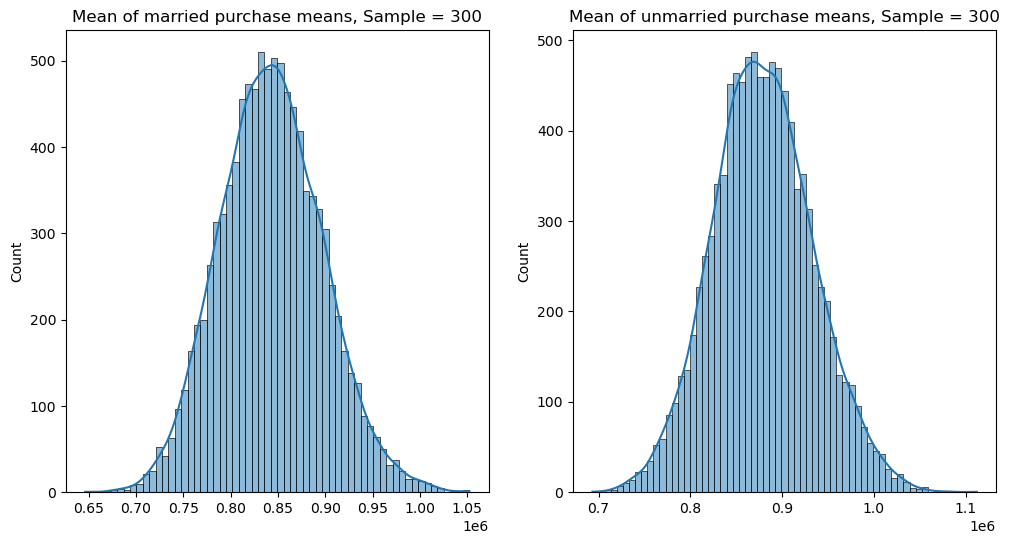

In [125]:
sample_size = 300 
sample_mean_married = []
sample_mean_unmarried = []
for i in range(10000) :
    married_spend_mean = df3[(df3["Marital_Status"]== 1)]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_married.append(married_spend_mean)
    unmarried_spend_mean = df3[(df3["Marital_Status"]== 0)]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_unmarried.append(unmarried_spend_mean)
    
    

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data = sample_mean_married,kde = True)
plt.title("Mean of married purchase means, Sample = 300")
plt.subplot(1,2,2)
sns.histplot(data = sample_mean_unmarried,kde = True)
plt.title("Mean of unmarried purchase means, Sample = 300")
plt.show()

In [126]:
# Mean of sample mean collection 

sample_mean_married = np.mean(sample_mean_married)
print("sample_mean_married :" ,sample_mean_married)
sample_mean_unmarried = np.mean(sample_mean_unmarried)
print("sample_mean_unmarried :", sample_mean_unmarried)

# Population mean for married and unmarried 

population_married_mean = married_data["Purchase"].mean()
print( "population_married_mean :", population_married_mean)
population_unmarried_mean = unmarried_data["Purchase"].mean()
print( "population_unmarried_mean :", population_unmarried_mean)

# population standard deviation for married and unmarried

population_married_std = married_data["Purchase"].std()
print( "population_married_std :", population_married_std )
population_unmarried_std = unmarried_data["Purchase"].std()
print( "population_unmarried_std :", population_unmarried_std )

# sample standard deviation for married and unmarried 

sample_married_std = population_married_std / np.sqrt(sample_size) 
sample_unmarried_std = population_unmarried_std / np.sqrt(sample_size)

sample_mean_married : 843163.60174
sample_mean_unmarried : 879475.965398
population_married_mean : 843526.7966855295
population_unmarried_mean : 880575.7819724905
population_married_std : 935352.1158252308
population_unmarried_std : 949436.249555238


90% CI

In [129]:
left_limit_married = sample_mean_married + norm.ppf(5/100) * ( sample_married_std ) 
upper_limit_married = sample_mean_married + norm.ppf(95/100) * ( sample_married_std)
married_CI = print("Married_CI_90 :" ,[left_limit_married,upper_limit_married])


left_limit_unmarried = sample_mean_unmarried + norm.ppf(5/100) * ( sample_unmarried_std ) 
upper_limit_unmarried = sample_mean_unmarried + norm.ppf(95/100) * ( sample_unmarried_std)
unmarried_CI = print("unmarried_CI_90 :" ,[left_limit_unmarried,upper_limit_unmarried])

Married_CI_90 : [754337.2628434325, 931989.9406365674]
unmarried_CI_90 : [789312.1173275077, 969639.8134684922]


95% CI 

In [130]:
left_limit_married = sample_mean_married + norm.ppf(2.5/100) * ( sample_married_std ) 
upper_limit_married = sample_mean_married + norm.ppf(97.5/100) * ( sample_married_std)
married_CI = print("Married_CI_95 :" ,[left_limit_married,upper_limit_married])


left_limit_unmarried = sample_mean_unmarried + norm.ppf(2.5/100) * ( sample_unmarried_std ) 
upper_limit_unmarried = sample_mean_unmarried + norm.ppf(97.5/100) * ( sample_unmarried_std)
unmarried_CI = print("unmarried_CI_95 :" ,[left_limit_unmarried,upper_limit_unmarried])

Married_CI_95 : [737320.4906794205, 949006.7128005794]
unmarried_CI_95 : [772039.1138568508, 986912.816939149]


99% CI 

In [131]:
left_limit_married = sample_mean_married + norm.ppf(0.5/100) * ( sample_married_std ) 
upper_limit_married = sample_mean_married + norm.ppf(99.5/100) * ( sample_married_std)
married_CI = print("Married_CI_99 :" ,[left_limit_married,upper_limit_married])


left_limit_unmarried = sample_mean_unmarried + norm.ppf(0.5/100) * ( sample_unmarried_std ) 
upper_limit_unmarried = sample_mean_unmarried + norm.ppf(99.5/100) * ( sample_unmarried_std)
unmarried_CI = print("unmarried_CI_99 :" ,[left_limit_unmarried,upper_limit_unmarried])

Married_CI_99 : [704062.174775463, 982265.028704537]
unmarried_CI_99 : [738280.0083989905, 1020671.9223970094]


## Sample size = 3000

In [133]:
sample_size = 3000 
sample_mean_married = []
sample_mean_unmarried = []
for i in range(1000) :
    married_spend_mean = df3[(df3["Marital_Status"]== 1)]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_married.append(married_spend_mean)
    unmarried_spend_mean = df3[(df3["Marital_Status"]== 0)]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_unmarried.append(unmarried_spend_mean)

In [134]:
# Mean of sample mean collection 

sample_mean_married = np.mean(sample_mean_married)
print("sample_mean_married :" ,sample_mean_married)
sample_mean_unmarried = np.mean(sample_mean_unmarried)
print("sample_mean_unmarried :", sample_mean_unmarried)

# Population mean for married and unmarried 

population_married_mean = married_data["Purchase"].mean()
print( "population_married_mean :", population_married_mean)
population_unmarried_mean = unmarried_data["Purchase"].mean()
print( "population_unmarried_mean :", population_unmarried_mean)

# population standard deviation for married and unmarried

population_married_std = married_data["Purchase"].std()
print( "population_married_std :", population_married_std )
population_unmarried_std = unmarried_data["Purchase"].std()
print( "population_unmarried_std :", population_unmarried_std )

# sample standard deviation for married and unmarried 

sample_married_std = population_married_std / np.sqrt(sample_size) 
sample_unmarried_std = population_unmarried_std / np.sqrt(sample_size)

sample_mean_married : 843694.006078
sample_mean_unmarried : 880312.099755
population_married_mean : 843526.7966855295
population_unmarried_mean : 880575.7819724905
population_married_std : 935352.1158252308
population_unmarried_std : 949436.249555238


90% CI 

In [135]:
left_limit_married = sample_mean_married + norm.ppf(5/100) * ( sample_married_std ) 
upper_limit_married = sample_mean_married + norm.ppf(95/100) * ( sample_married_std)
married_CI = print("Married_CI_90 :" ,[left_limit_married,upper_limit_married])


left_limit_unmarried = sample_mean_unmarried + norm.ppf(5/100) * ( sample_unmarried_std ) 
upper_limit_unmarried = sample_mean_unmarried + norm.ppf(95/100) * ( sample_unmarried_std)
unmarried_CI = print("unmarried_CI_90 :" ,[left_limit_unmarried,upper_limit_unmarried])

Married_CI_90 : [815604.6513652839, 871783.360790716]
unmarried_CI_90 : [851799.7875041866, 908824.4120058133]


95% CI 

In [136]:
left_limit_married = sample_mean_married + norm.ppf(2.5/100) * ( sample_married_std ) 
upper_limit_married = sample_mean_married + norm.ppf(97.5/100) * ( sample_married_std)
married_CI = print("Married_CI_95 :" ,[left_limit_married,upper_limit_married])


left_limit_unmarried = sample_mean_unmarried + norm.ppf(2.5/100) * ( sample_unmarried_std ) 
upper_limit_unmarried = sample_mean_unmarried + norm.ppf(97.5/100) * ( sample_unmarried_std)
unmarried_CI = print("unmarried_CI_95 :" ,[left_limit_unmarried,upper_limit_unmarried])

Married_CI_95 : [810223.4755190408, 877164.5366369591]
unmarried_CI_95 : [846337.5842042597, 914286.6153057403]


99% CI 

In [137]:
left_limit_married = sample_mean_married + norm.ppf(0.5/100) * ( sample_married_std ) 
upper_limit_married = sample_mean_married + norm.ppf(99.5/100) * ( sample_married_std)
married_CI = print("Married_CI_99 :" ,[left_limit_married,upper_limit_married])


left_limit_unmarried = sample_mean_unmarried + norm.ppf(0.5/100) * ( sample_unmarried_std ) 
upper_limit_unmarried = sample_mean_unmarried + norm.ppf(99.5/100) * ( sample_unmarried_std)
unmarried_CI = print("unmarried_CI_99 :" ,[left_limit_unmarried,upper_limit_unmarried])

Married_CI_99 : [799706.27257925, 887681.7395767499]
unmarried_CI_99 : [835662.0177025937, 924962.1818074062]


For married and unmarried we can see that larger the sample size we get closer the sample mean to actual population mean and greater the confidence interval the ranges increase and upper range of married and lower range of unmarried data overlap for some values.

# CLT and CI for Age group -

In [139]:
df4 = df.groupby(["User_ID","Age"])["Purchase"].sum().reset_index()
df4.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001


In [142]:
_17_data = df4.loc[(df4["Age"] == "0-17" )]
_17_data.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
18,1000019,0-17,1458069
48,1000051,0-17,200772
72,1000075,0-17,1035584
83,1000086,0-17,294063


In [143]:
_25_data = df4.loc[(df4["Age"] == "18-25" )]
_25_data.head()

,User_ID,Age,Purchase
17,1000018,18-25,1979047
20,1000021,18-25,127099
21,1000022,18-25,1279914
24,1000025,18-25,534706
33,1000034,18-25,807983


In [144]:
_35_data = df4.loc[(df4["Age"] == "26-35" )]
_35_data.head()

,User_ID,Age,Purchase
2,1000003,26-35,341635
4,1000005,26-35,821001
7,1000008,26-35,796593
8,1000009,26-35,594099
10,1000011,26-35,557023


In [150]:
_50_data = df4.loc[(df4["Age"] == "36-45" ) | (df4["Age"] == "46-50" )]
_50_data.head()

,User_ID,Age,Purchase
3,1000004,46-50,206468
6,1000007,36-45,234668
9,1000010,36-45,2169510
12,1000013,46-50,713927
13,1000014,36-45,127629


In [151]:
_50plus_data = df4.loc[(df4["Age"] == "51-55" ) | (df4["Age"] == "55+" )]
_50plus_data.head()

,User_ID,Age,Purchase
1,1000002,55+,810472
5,1000006,51-55,379930
16,1000017,51-55,1425995
30,1000031,55+,496154
51,1000054,51-55,187451


## Sample size = 300

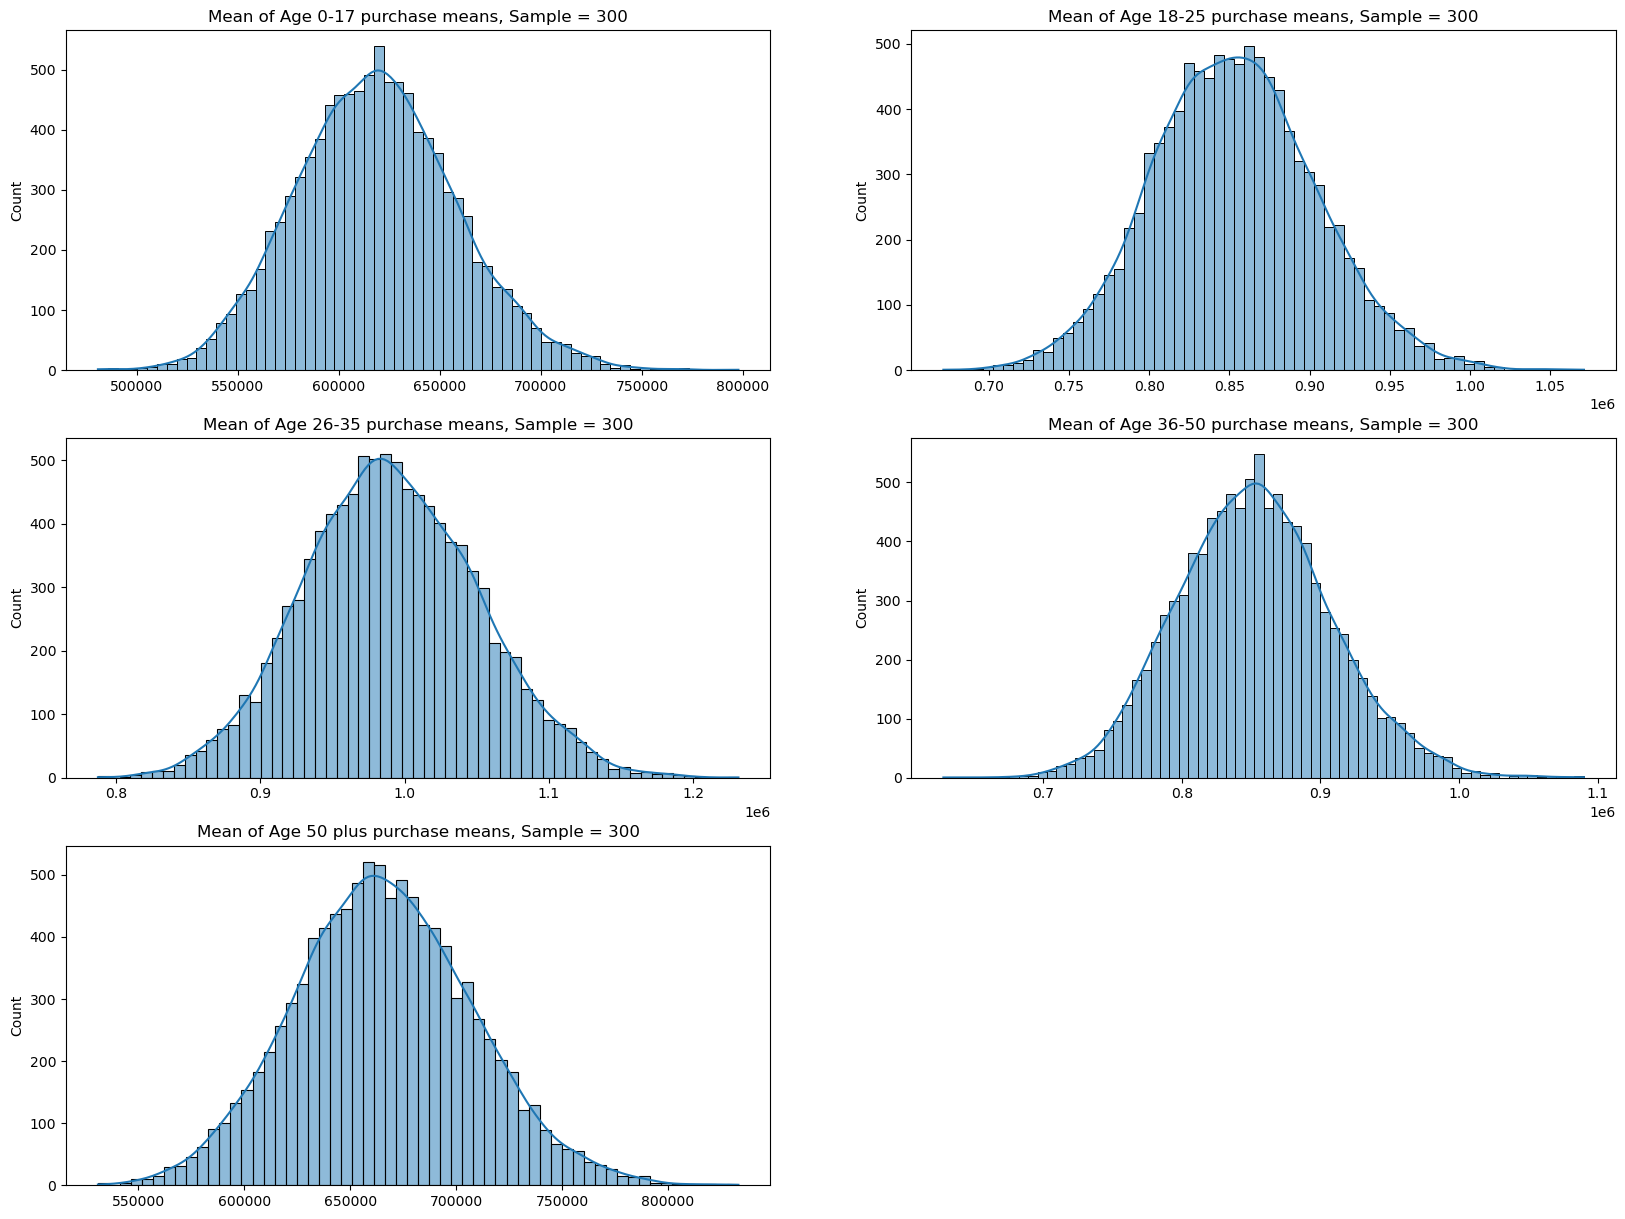

In [154]:
sample_size = 300 
sample_mean_17_data = []
sample_mean_25_data = []
sample_mean_35_data = []
sample_mean_50_data = []
sample_mean_50plus_data = []
for i in range(10000) :
    _17_spend_mean = df4[(df4["Age"]== "0-17")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_17_data.append(_17_spend_mean)
    _25_spend_mean = df4[(df4["Age"]== "18-25")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_25_data.append(_25_spend_mean)
    _35_spend_mean = df4[(df4["Age"]== "26-35")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_35_data.append(_35_spend_mean)
    _50_spend_mean = df4[(df4["Age"] == "36-45" ) | (df4["Age"] == "46-50" )]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_50_data.append(_50_spend_mean)
    _50plus_spend_mean = df4[(df4["Age"] == "51-55" ) | (df4["Age"] == "55+" )]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_50plus_data.append(_50plus_spend_mean)
    
    
    

plt.figure(figsize = (20,15))
plt.subplot(3,2,1)
sns.histplot(data = sample_mean_17_data,kde = True)
plt.title("Mean of Age 0-17 purchase means, Sample = 300")
plt.subplot(3,2,2)
sns.histplot(data = sample_mean_25_data,kde = True)
plt.title("Mean of Age 18-25 purchase means, Sample = 300")
plt.subplot(3,2,3)
sns.histplot(data = sample_mean_35_data,kde = True)
plt.title("Mean of Age 26-35 purchase means, Sample = 300")
plt.subplot(3,2,4)
sns.histplot(data = sample_mean_50_data,kde = True)
plt.title("Mean of Age 36-50 purchase means, Sample = 300")
plt.subplot(3,2,5)
sns.histplot(data = sample_mean_50plus_data,kde = True)
plt.title("Mean of Age 50 plus purchase means, Sample = 300")
plt.show()

In [155]:
# Mean of sample mean collection 

sample_mean_17_data = np.mean(sample_mean_17_data)
print("sample_mean_17_data :" ,sample_mean_17_data)
sample_mean_25_data = np.mean(sample_mean_25_data)
print("sample_mean_25_data :", sample_mean_25_data)
sample_mean_35_data = np.mean(sample_mean_35_data)
print("sample_mean_35_data :" ,sample_mean_35_data)
sample_mean_50_data = np.mean(sample_mean_50_data)
print("sample_mean_50_data :", sample_mean_50_data)
sample_mean_50plus_data = np.mean(sample_mean_50plus_data)
print("sample_mean_50plus_data :", sample_mean_50plus_data)

# Population mean for Age group

population_17_mean = _17_data["Purchase"].mean()
print( "population_17_mean :", population_17_mean)
population_25_mean = _25_data["Purchase"].mean()
print( "population_25_mean :", population_25_mean)
population_35_mean = _35_data["Purchase"].mean()
print( "population_35_mean :", population_35_mean)
population_50_mean = _50_data["Purchase"].mean()
print( "population_50_mean :", population_50_mean)
population_50plus_mean = _50plus_data["Purchase"].mean()
print( "population_50plus_mean :", population_50plus_mean)


# population standard deviation for Age groups

population_17_std = _17_data["Purchase"].std()
print( "population_17_std :", population_17_std)
population_25_std = _25_data["Purchase"].std()
print( "population_25_std :", population_25_std)
population_35_std = _35_data["Purchase"].std()
print( "population_35_std :", population_35_std)
population_50_std = _50_data["Purchase"].std()
print( "population_50_std :", population_50_std)
population_50plus_std = _50plus_data["Purchase"].std()
print( "population_50plus_std :", population_50plus_std)

# sample standard deviation for Age groups

sample_17_std = population_17_std / np.sqrt(sample_size) 
sample_25_std = population_25_std / np.sqrt(sample_size) 
sample_35_std = population_35_std / np.sqrt(sample_size) 
sample_50_std = population_50_std / np.sqrt(sample_size) 
sample_50plus_std = population_50plus_std / np.sqrt(sample_size) 

sample_mean_17_data : 618830.2024173333
sample_mean_25_data : 853132.668424
sample_mean_35_data : 990944.1880533333
sample_mean_50_data : 852447.9771896666
sample_mean_50plus_data : 665768.6786859998
population_17_mean : 618867.8119266055
population_25_mean : 854863.119738073
population_35_mean : 989659.3170969313
population_50_mean : 852422.4305064782
population_50plus_mean : 665729.2133645955
population_17_std : 687056.5978868342
population_25_std : 887957.2520758108
population_35_std : 1031610.1238008776
population_50_std : 966107.0913208744
population_50plus_std : 729384.4598115806


90% CI 

In [161]:
left_limit_17 = sample_mean_17_data + norm.ppf(5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(95/100) * ( sample_17_std)
_17_CI = print("17_CI_90 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(95/100) * ( sample_25_std)
_25_CI = print("25_CI_90 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(95/100) * ( sample_35_std)
_35_CI = print("35_CI_90 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(95/100) * ( sample_50_std)
_50_CI = print("50_CI_90 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(95/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_90 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_90 : [553583.4133499082, 684076.9914847583]
25_CI_90 : [768807.2144435353, 937458.1224044646]
35_CI_90 : [892976.6430876378, 1088911.7330190288]
50_CI_90 : [760700.9714876133, 944194.9828917198]
50plus_CI_90 : [596502.195917687, 735035.1614543126]


95% CI 

In [162]:
left_limit_17 = sample_mean_17_data + norm.ppf(2.5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(97.5/100) * ( sample_17_std)
_17_CI = print("17_CI_95 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(2.5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(97.5/100) * ( sample_25_std)
_25_CI = print("25_CI_95 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(2.5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(97.5/100) * ( sample_35_std)
_35_CI = print("35_CI_95 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(2.5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(97.5/100) * ( sample_50_std)
_50_CI = print("50_CI_95 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(2.5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(97.5/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_95 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_95 : [541083.8579501682, 696576.5468844983]
25_CI_95 : [752652.6925321533, 953612.6443158467]
35_CI_95 : [874208.6581311707, 1107679.7179754958]
50_CI_95 : [743124.6769768139, 961771.2774025192]
50plus_CI_95 : [583232.5737480358, 748304.7836239638]


99% CI 

In [163]:
left_limit_17 = sample_mean_17_data + norm.ppf(0.5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(99.5/100) * ( sample_17_std)
_17_CI = print("17_CI_99 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(0.5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(99.5/100) * ( sample_25_std)
_25_CI = print("25_CI_99 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(0.5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(99.5/100) * ( sample_35_std)
_35_CI = print("35_CI_99 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(0.5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(99.5/100) * ( sample_50_std)
_50_CI = print("50_CI_99 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(0.5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(99.5/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_99 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_99 : [516654.18596908916, 721006.2188655774]
25_CI_99 : [721079.5958350959, 985185.7410129042]
35_CI_99 : [837527.6961633665, 1144360.6799433]
50_CI_99 : [708772.8063854324, 996123.1479939008]
50plus_CI_99 : [557297.8499478456, 774239.5074241541]


## Sample size  = 3000

In [164]:
sample_size = 3000 
sample_mean_17_data = []
sample_mean_25_data = []
sample_mean_35_data = []
sample_mean_50_data = []
sample_mean_50plus_data = []
for i in range(10000) :
    _17_spend_mean = df4[(df4["Age"]== "0-17")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_17_data.append(_17_spend_mean)
    _25_spend_mean = df4[(df4["Age"]== "18-25")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_25_data.append(_25_spend_mean)
    _35_spend_mean = df4[(df4["Age"]== "26-35")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_35_data.append(_35_spend_mean)
    _50_spend_mean = df4[(df4["Age"] == "36-45" ) | (df4["Age"] == "46-50" )]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_50_data.append(_50_spend_mean)
    _50plus_spend_mean = df4[(df4["Age"] == "51-55" ) | (df4["Age"] == "55+" )]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_50plus_data.append(_50plus_spend_mean)

In [165]:
# Mean of sample mean collection 

sample_mean_17_data = np.mean(sample_mean_17_data)
print("sample_mean_17_data :" ,sample_mean_17_data)
sample_mean_25_data = np.mean(sample_mean_25_data)
print("sample_mean_25_data :", sample_mean_25_data)
sample_mean_35_data = np.mean(sample_mean_35_data)
print("sample_mean_35_data :" ,sample_mean_35_data)
sample_mean_50_data = np.mean(sample_mean_50_data)
print("sample_mean_50_data :", sample_mean_50_data)
sample_mean_50plus_data = np.mean(sample_mean_50plus_data)
print("sample_mean_50plus_data :", sample_mean_50plus_data)

# Population mean for Age group

population_17_mean = _17_data["Purchase"].mean()
print( "population_17_mean :", population_17_mean)
population_25_mean = _25_data["Purchase"].mean()
print( "population_25_mean :", population_25_mean)
population_35_mean = _35_data["Purchase"].mean()
print( "population_35_mean :", population_35_mean)
population_50_mean = _50_data["Purchase"].mean()
print( "population_50_mean :", population_50_mean)
population_50plus_mean = _50plus_data["Purchase"].mean()
print( "population_50plus_mean :", population_50plus_mean)


# population standard deviation for Age groups

population_17_std = _17_data["Purchase"].std()
print( "population_17_std :", population_17_std)
population_25_std = _25_data["Purchase"].std()
print( "population_25_std :", population_25_std)
population_35_std = _35_data["Purchase"].std()
print( "population_35_std :", population_35_std)
population_50_std = _50_data["Purchase"].std()
print( "population_50_std :", population_50_std)
population_50plus_std = _50plus_data["Purchase"].std()
print( "population_50plus_std :", population_50plus_std)

# sample standard deviation for Age groups

sample_17_std = population_17_std / np.sqrt(sample_size) 
sample_25_std = population_25_std / np.sqrt(sample_size) 
sample_35_std = population_35_std / np.sqrt(sample_size) 
sample_50_std = population_50_std / np.sqrt(sample_size) 
sample_50plus_std = population_50plus_std / np.sqrt(sample_size) 

sample_mean_17_data : 618929.5945612
sample_mean_25_data : 854659.1974026667
sample_mean_35_data : 989941.0212391333
sample_mean_50_data : 852218.4436376668
sample_mean_50plus_data : 665667.4068248332
population_17_mean : 618867.8119266055
population_25_mean : 854863.119738073
population_35_mean : 989659.3170969313
population_50_mean : 852422.4305064782
population_50plus_mean : 665729.2133645955
population_17_std : 687056.5978868342
population_25_std : 887957.2520758108
population_35_std : 1031610.1238008776
population_50_std : 966107.0913208744
population_50plus_std : 729384.4598115806


90% CI

In [166]:
left_limit_17 = sample_mean_17_data + norm.ppf(5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(95/100) * ( sample_17_std)
_17_CI = print("17_CI_90 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(95/100) * ( sample_25_std)
_25_CI = print("25_CI_90 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(95/100) * ( sample_35_std)
_35_CI = print("35_CI_90 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(95/100) * ( sample_50_std)
_50_CI = print("50_CI_90 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(95/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_90 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_90 : [598296.7482146363, 639562.4409077637]
25_CI_90 : [827993.1474720687, 881325.2473332647]
35_CI_90 : [958960.9633524773, 1020921.0791257893]
50_CI_90 : [823205.4929857723, 881231.3942895612]
50plus_CI_90 : [643763.4217191659, 687571.3919305006]


95% CI 

In [167]:
left_limit_17 = sample_mean_17_data + norm.ppf(2.5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(97.5/100) * ( sample_17_std)
_17_CI = print("17_CI_95 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(2.5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(97.5/100) * ( sample_25_std)
_25_CI = print("25_CI_95 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(2.5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(97.5/100) * ( sample_35_std)
_35_CI = print("35_CI_95 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(2.5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(97.5/100) * ( sample_50_std)
_50_CI = print("50_CI_95 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(2.5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(97.5/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_95 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_95 : [594344.0417343728, 643515.1473880272]
25_CI_95 : [822884.6390969623, 886433.755708371]
35_CI_95 : [953026.0053970561, 1026856.0370812105]
50_CI_95 : [817647.3806377682, 886789.5066375652]
50plus_CI_95 : [639567.1987445696, 691767.6149050969]


99% CI

In [168]:
left_limit_17 = sample_mean_17_data + norm.ppf(0.5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(99.5/100) * ( sample_17_std)
_17_CI = print("17_CI_99 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(0.5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(99.5/100) * ( sample_25_std)
_25_CI = print("25_CI_99 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(0.5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(99.5/100) * ( sample_35_std)
_35_CI = print("35_CI_99 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(0.5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(99.5/100) * ( sample_50_std)
_50_CI = print("50_CI_99 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(0.5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(99.5/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_99 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_99 : [586618.7011392721, 651240.4879831279]
25_CI_99 : [812900.3492622181, 896418.0455431152]
35_CI_99 : [941426.4667386288, 1038455.5757396378]
50_CI_99 : [806784.3653421561, 897652.5219331774]
50plus_CI_99 : [631365.9189749717, 699968.8946746947]


## Sample size = 5000

In [169]:
sample_size = 5000 
sample_mean_17_data = []
sample_mean_25_data = []
sample_mean_35_data = []
sample_mean_50_data = []
sample_mean_50plus_data = []
for i in range(10000) :
    _17_spend_mean = df4[(df4["Age"]== "0-17")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_17_data.append(_17_spend_mean)
    _25_spend_mean = df4[(df4["Age"]== "18-25")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_25_data.append(_25_spend_mean)
    _35_spend_mean = df4[(df4["Age"]== "26-35")]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_35_data.append(_35_spend_mean)
    _50_spend_mean = df4[(df4["Age"] == "36-45" ) | (df4["Age"] == "46-50" )]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_50_data.append(_50_spend_mean)
    _50plus_spend_mean = df4[(df4["Age"] == "51-55" ) | (df4["Age"] == "55+" )]["Purchase"].sample(sample_size,replace = True).mean()
    sample_mean_50plus_data.append(_50plus_spend_mean)

In [171]:
# Mean of sample mean collection 

sample_mean_17_data = np.mean(sample_mean_17_data)
print("sample_mean_17_data :" ,sample_mean_17_data)
sample_mean_25_data = np.mean(sample_mean_25_data)
print("sample_mean_25_data :", sample_mean_25_data)
sample_mean_35_data = np.mean(sample_mean_35_data)
print("sample_mean_35_data :" ,sample_mean_35_data)
sample_mean_50_data = np.mean(sample_mean_50_data)
print("sample_mean_50_data :", sample_mean_50_data)
sample_mean_50plus_data = np.mean(sample_mean_50plus_data)
print("sample_mean_50plus_data :", sample_mean_50plus_data)

# Population mean for Age group

population_17_mean = _17_data["Purchase"].mean()
print( "population_17_mean :", population_17_mean)
population_25_mean = _25_data["Purchase"].mean()
print( "population_25_mean :", population_25_mean)
population_35_mean = _35_data["Purchase"].mean()
print( "population_35_mean :", population_35_mean)
population_50_mean = _50_data["Purchase"].mean()
print( "population_50_mean :", population_50_mean)
population_50plus_mean = _50plus_data["Purchase"].mean()
print( "population_50plus_mean :", population_50plus_mean)


# population standard deviation for Age groups

population_17_std = _17_data["Purchase"].std()
print( "population_17_std :", population_17_std)
population_25_std = _25_data["Purchase"].std()
print( "population_25_std :", population_25_std)
population_35_std = _35_data["Purchase"].std()
print( "population_35_std :", population_35_std)
population_50_std = _50_data["Purchase"].std()
print( "population_50_std :", population_50_std)
population_50plus_std = _50plus_data["Purchase"].std()
print( "population_50plus_std :", population_50plus_std)

# sample standard deviation for Age groups

sample_17_std = population_17_std / np.sqrt(sample_size) 
sample_25_std = population_25_std / np.sqrt(sample_size) 
sample_35_std = population_35_std / np.sqrt(sample_size) 
sample_50_std = population_50_std / np.sqrt(sample_size) 
sample_50plus_std = population_50plus_std / np.sqrt(sample_size) 

sample_mean_17_data : 618991.6779975201
sample_mean_25_data : 854931.1258890199
sample_mean_35_data : 989651.1230197601
sample_mean_50_data : 852556.3705831
sample_mean_50plus_data : 665705.6347180401
population_17_mean : 618867.8119266055
population_25_mean : 854863.119738073
population_35_mean : 989659.3170969313
population_50_mean : 852422.4305064782
population_50plus_mean : 665729.2133645955
population_17_std : 687056.5978868342
population_25_std : 887957.2520758108
population_35_std : 1031610.1238008776
population_50_std : 966107.0913208744
population_50plus_std : 729384.4598115806


90% CI 

In [172]:
left_limit_17 = sample_mean_17_data + norm.ppf(5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(95/100) * ( sample_17_std)
_17_CI = print("17_CI_90 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(95/100) * ( sample_25_std)
_25_CI = print("25_CI_90 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(95/100) * ( sample_35_std)
_35_CI = print("35_CI_90 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(95/100) * ( sample_50_std)
_50_CI = print("50_CI_90 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(95/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_90 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_90 : [603009.5439405006, 634973.8120545396]
25_CI_90 : [834275.6924309516, 875586.5593470882]
35_CI_90 : [965654.0733678481, 1013648.1726716722]
50_CI_90 : [830083.0356432751, 875029.7055229249]
50plus_CI_90 : [648738.8808120751, 682672.3886240051]


95% CI 

In [173]:
left_limit_17 = sample_mean_17_data + norm.ppf(2.5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(97.5/100) * ( sample_17_std)
_17_CI = print("17_CI_95 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(2.5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(97.5/100) * ( sample_25_std)
_25_CI = print("25_CI_95 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(2.5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(97.5/100) * ( sample_35_std)
_35_CI = print("35_CI_95 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(2.5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(97.5/100) * ( sample_50_std)
_50_CI = print("50_CI_95 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(2.5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(97.5/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_95 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_95 : [599947.7906663992, 638035.5653286409]
25_CI_95 : [830318.6588588019, 879543.5929192379]
35_CI_95 : [961056.8747034905, 1018245.3713360297]
50_CI_95 : [825777.7403312412, 879335.0008349589]
50plus_CI_95 : [645488.5004725582, 685922.768963522]


99% CI 

In [174]:
left_limit_17 = sample_mean_17_data + norm.ppf(0.5/100) * ( sample_17_std ) 
right_limit_17 = sample_mean_17_data + norm.ppf(99.5/100) * ( sample_17_std)
_17_CI = print("17_CI_99 :" ,[left_limit_17,right_limit_17])

left_limit_25 = sample_mean_25_data + norm.ppf(0.5/100) * ( sample_25_std ) 
right_limit_25 = sample_mean_25_data + norm.ppf(99.5/100) * ( sample_25_std)
_25_CI = print("25_CI_99 :" ,[left_limit_25,right_limit_25])


left_limit_35 = sample_mean_35_data + norm.ppf(0.5/100) * ( sample_35_std ) 
right_limit_35 = sample_mean_35_data + norm.ppf(99.5/100) * ( sample_35_std)
_35_CI = print("35_CI_99 :" ,[left_limit_35,right_limit_35])

left_limit_50 = sample_mean_50_data + norm.ppf(0.5/100) * ( sample_50_std ) 
right_limit_50 = sample_mean_50_data + norm.ppf(99.5/100) * ( sample_50_std)
_50_CI = print("50_CI_99 :" ,[left_limit_50,right_limit_50])

left_limit_50plus = sample_mean_50plus_data + norm.ppf(0.5/100) * ( sample_50plus_std ) 
right_limit_50plus = sample_mean_50plus_data + norm.ppf(99.5/100) * ( sample_50plus_std)
_50plus_CI = print("50plus_CI_99 :" ,[left_limit_50plus,right_limit_50plus])

17_CI_99 : [593963.7675726782, 644019.588422362]
25_CI_99 : [822584.8612080676, 887277.3905699722]
35_CI_99 : [952071.9106939349, 1027230.3353455854]
50_CI_99 : [817363.2848653407, 887749.4563008593]
50plus_CI_99 : [639135.8164795102, 692275.4529565701]


For different age group we can see that larger the sample size we get closer the sample mean to actual population mean and greater the confidence interval the ranges increase and for some age group spending amout overlap with other age group pruchase amount.

# Questions -

## 1. Are women spending more money per transaction than men? Why or Why not? 
Ans- No , women are not spending more money than men acutally men are spending more money than women there could be various reasons like in given data more products has male prefered than female , men are spending monehy for female , might be occupation releated to male has higher than female.


## 2. Confidence intervals and distribution of the mean of the expenses by female and male customers?
Ans- For sample size = 3000 From above data we can see that 
For 90% CI- Average amount spent by male lie in range : [896362.7607421139, 955573.2568092195] Average amount spent by female lie in range : [687825.1335233083, 736317.0807326916]

For 95% CI - Average amount spent by male lie in range : [890691.1799148027, 961244.8376365307] Average amount spent by female lie in range : [683180.2476274018, 740961.9666285982]

For 99% CI - Average amount spent by male lie in range : [879606.3969129788, 972329.6206383546] Average amount spent by female lie in range : [674102.0816288816, 750040.1326271184]


## 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
Ans - No overlaping for average spending by male and female for 90 , 95 and 95% confidence interval, this trend could be change by attracting female customers to shop more by introducing their choice products and catrgory by walmart.


## 4. Results when the same activity is performed for Married vs Unmarried?
Ans- For sample size = 3000 and at 99% confidende interval 
Average spending money by married customers lie in range : [799706.27257925, 887681.7395767499]
Average spending purchase by unmarried customers lie in range : [835662.0177025937, 924962.1818074062]
,We can observe that there are some overlapping in purchase.

## 5. Results when the same activity is performed for Age ?
Ans - For sample size = 3000 and at 99% confidence interval spending amount for age group -
Age group 0-17 CI : [586618.7011392721, 651240.4879831279]
Age group 18-25 CI : [812900.3492622181, 896418.0455431152]
Age group 26-35 CI : [941426.4667386288, 1038455.5757396378]
Age group 36-50 CI : [806784.3653421561, 897652.5219331774]
Age group 50+ CI : [631365.9189749717, 699968.8946746947]
,Here some age group spending are overlapping with other age group spending.

# Insights- 

## For sample size = 3000

At 99% Confidence Interval -

Men are spending more than female with Average amount spent by male lie in range : [879606.3969129788, 972329.6206383546] and  Average amount spent by female lie in range : [674102.0816288816, 750040.1326271184]

Unmarried customers are spending more than married customers with  Average spending money by married customers lie in range : [799706.27257925, 887681.7395767499]and Average spending purchase by unmarried customers lie in range : [835662.0177025937, 924962.1818074062] 

Age group 26-35 are spending most than other age group with spending amount for age group Age group 0-17 CI : [586618.7011392721, 651240.4879831279] Age group 18-25 CI : [812900.3492622181, 896418.0455431152] Age group 26-35 CI : [941426.4667386288, 1038455.5757396378] Age group 36-50 CI : [806784.3653421561, 897652.5219331774] Age group 50+ CI : [631365.9189749717, 699968.8946746947] .

At 90% confidence Interval - spending amount are 

Average amount spent by male lie in range : [896362.7607421139, 955573.2568092195] and Average amount spent by female lie in range : [687825.1335233083, 736317.0807326916]

Married_CI_90 : [815604.6513652839, 871783.360790716]
unmarried_CI_90 : [851799.7875041866, 908824.4120058133]

17_CI_90 : [598296.7482146363, 639562.4409077637]
25_CI_90 : [827993.1474720687, 881325.2473332647]
35_CI_90 : [958960.9633524773, 1020921.0791257893]
50_CI_90 : [823205.4929857723, 881231.3942895612]
50plus_CI_90 : [643763.4217191659, 687571.3919305006]

Mean of sample mean are following centre limit theorem so they are distributed as normal distribution but average spending of male are female likely distributed as lognormal or exponential distribution we can see that in graph.

# Recommendations - 

## Here are some recommendations for company - 

1. Men are speding more so company could adverstise and give some discount for male and their product categories and for female spending company offers more female product category and quantity/quality.

2. Unmarried spending more than married so company need to focus on married customers so they could buy more products.

3. Age category 26-35 has maximum spending for that company should understand their spending product category and fulfill their stock and could more promotion & attraction to this age group because it has maximum spending group.

4. company should enough stock of product category 5, 1 and 8 because it is maximum purchasing category and category 9, 17 , 14 might be dropped.

5. City category B has maximum customers but city category C male customers are purchasing highest so company need to focus and promot on city category B.

6. customer are purchasing more than average company could give some additional offers and discounts and they could buy more.

7. company can derive insights from customers feedback what type products they want so improve quality , quantity, products and services.